## Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']= (17, 5)
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [51]:
data = pd.read_csv('C:\\Users\Maria\Desktop\Data Science\Seminars\CodeHub\Pfizer\Project\data.csv')
data.head(3)

,gender,age,hospitalization,admission_type,admission_origin,admission_diagnosis,insurance,religion,marital_status,ethnicity,...,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
0,M,66,5.92,EMERGENCY,CLINIC REFERRAL,PNEUMONIA,Medicare,NOT SPECIFIED,DIVORCED,WHITE,...,7.0,37.0,3.0,0.0,2.0,0.0,1.0,356.0,0,0
1,M,26,3.79,EMERGENCY,EMERGENCY ROOM ADMISSION,SEIZURE,Government,NOT SPECIFIED,SINGLE,PATIENT DECLINED TO ANSWER,...,51.0,44.0,2.0,1.0,11.0,0.0,1.0,763.0,0,1
2,M,51,18.00,EMERGENCY,ER ADMISSION,SCALP LACERATION;RESPIRATORY FAILURE,Government,UNOBTAINABLE,DIVORCED,BLACK/AFRICAN AMERICAN,...,63.0,48.0,3.0,0.0,16.0,0.0,0.0,1102.0,0,2


In [157]:
data.isna().sum()  # Number on NaN values in our dataset

gender                       0
age                          0
hospitalization              0
admission_type               0
admission_origin          3576
admission_diagnosis         21
insurance                  830
religion                   378
marital_status            8649
ethnicity                  701
num_callouts                 0
num_diagnoses                0
num_procedures               0
admission_procedure       1492
num_cptevents                0
num_inputevents              0
num_labevents                0
num_microbiologyevents       0
num_noteevents               0
num_outputevents             0
num_procedureevents          0
num_transfers                0
num_chartevents              0
expired                      0
patient_id                   0
dtype: int64

# 1. Hospitalization

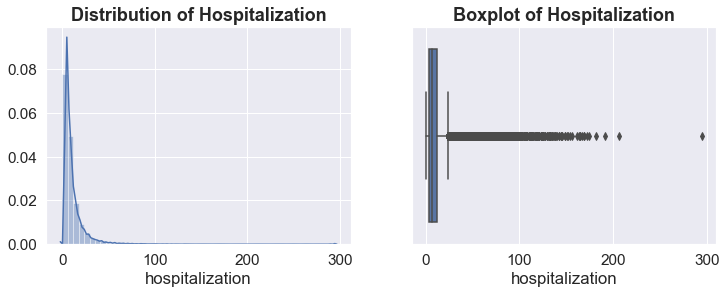

In [44]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Hospitalization', fontweight= 'bold', fontsize=18)
sns.distplot(data['hospitalization'], ax=ax1)
ax2 = plt.subplot(122)
ax2.set_title('Boxplot of Hospitalization', fontweight= 'bold', fontsize=18)
sns.boxplot(x='hospitalization', data=data, ax=ax2)

# 2. Gender

In [163]:
frequency_gender = pd.DataFrame({'Absolute':data['gender'].value_counts(),
                                 'Relative':(data['gender'].value_counts())/len(data)})
frequency_gender

,Absolute,Relative
M,27353,0.558498
F,21623,0.441502


Text(0.5, 1.0, 'Mean Hospitalization per Gender')

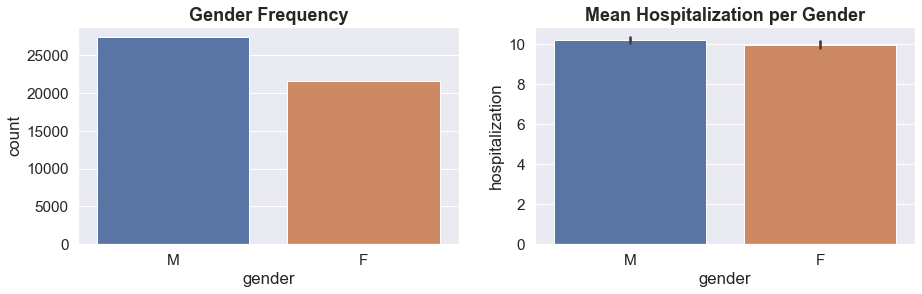

In [45]:
plt.figure(figsize=(15, 4))
ax1= plt.subplot(121)
ax1.set_title('Gender Frequency', fontweight= 'bold', fontsize=18)
ax1 =sns.countplot(x='gender', data=data)
plt.subplot(122)
ax2 =sns.barplot(x='gender', y='hospitalization', data=data)
ax2.set_title('Mean Hospitalization per Gender', fontweight= 'bold', fontsize=18)

# 3. Age

Text(0.5, 1.0, 'Relationship between hospitalization and age')

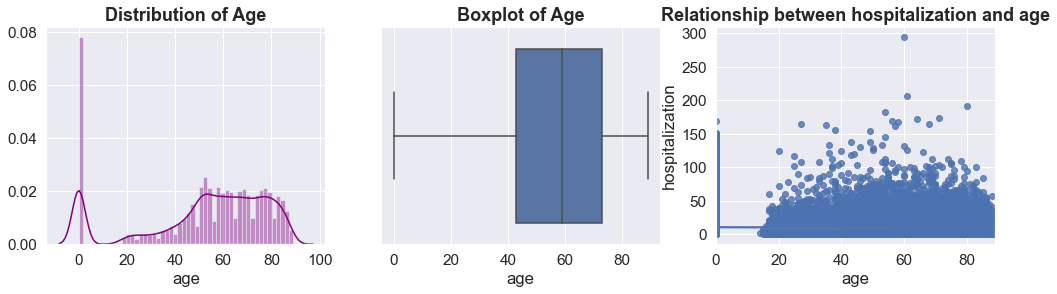

In [46]:
plt.figure(figsize= (17,4))
ax1 = plt.subplot(131)
ax1.set_title('Distribution of Age', fontweight= 'bold', fontsize=18)
ax1= sns.distplot(data['age'], color='purple')
ax2 = plt.subplot(132)
ax2 = sns.boxplot(x='age', data=data, ax=ax2)
ax2.set_title('Boxplot of Age', fontweight= 'bold', fontsize=18)
ax3 = plt.subplot(133)
ax3 = sns.regplot(x='age', y='hospitalization', data=data) 
ax3.set_title('Relationship between hospitalization and age', fontweight= 'bold', fontsize=18)

# 4. Admission Type

In [168]:
frequency_adm_type = pd.DataFrame({'Absolute':data['admission_type'].value_counts(),
                                  'Relative':(data['admission_type'].value_counts())/len(data)})
frequency_adm_type

,Absolute,Relative
EMERGENCY,34894,0.712471
NEWBORN,6586,0.134474
ELECTIVE,6379,0.130247
URGENT,1117,0.022807


[Text(0, 0, 'EMERGENCY'),
 Text(0, 0, 'URGENT'),
 Text(0, 0, 'ELECTIVE'),
 Text(0, 0, 'NEWBORN')]

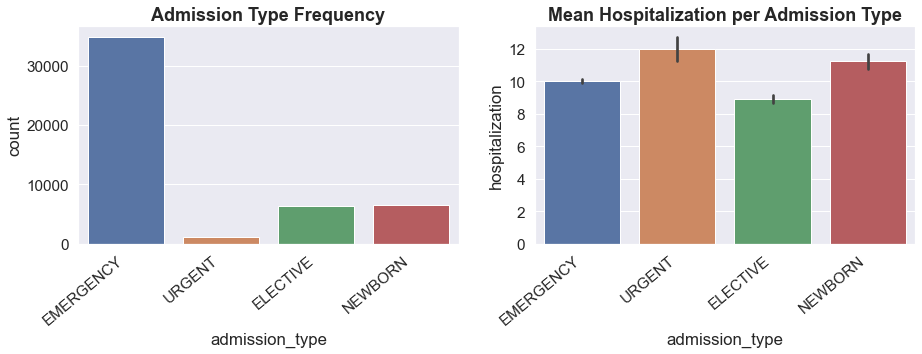

In [49]:
plt.figure(figsize=(15, 4))
ax1 =plt.subplot(121)
ax1.set_title('Admission Type Frequency', fontweight= 'bold', fontsize=18)
ax1=sns.countplot(x='admission_type', data=data)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha= 'right')
ax2 = plt.subplot(122)
ax2.set_title('Mean Hospitalization per Admission Type', fontweight= 'bold', fontsize=18)
ax2 =sns.barplot(x='admission_type', y='hospitalization', data=data)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha= 'right')

# 5. Admission Origin

In [171]:
data['admission_origin'].value_counts()  

EMERGENCY ROOM ADMISSION              10729
PHYSICAL REFERRAL                      9617
CLINIC REFERRAL                        6805
TRANSFER FROM HOSPITAL                 5607
ADMITTED FROM EMERGENCY                3087
ER ADMISSION                           1822
CLINIC REFERAL                          824
TRANFSER FROM HOSPITAL                  664
REFERRAL                                637
CLINIC                                  554
FROM CLINIC                             479
CLINIC  REFERRAL                        296
 PHYSICAL REFERRAL                      285
ADMITTED FRIM EMERGENCY                 273
EMERGENCY ROOM ADMIT                    266
EMERGENCY ROOM ADMISSION                264
 REFERRAL                               201
 CLINIC REFERRAL                        200
PHYS REFERRAL                           196
EMERGENCY ROOM ADMISSION                194
TFH                                     180
TRANSFER FROM SKILLED NURSE             175
PHYSICAL REFERRAL               

In [248]:
print(data['admission_origin'].isna().sum())  # Number of Nan values
print('Percentage of NaN values: ', 3576/48976)

3576
Percentage of NaN values:  0.07301535445932701


In [37]:
data['admission_origin'] = data['admission_origin'].str.replace('  +', ' ')   # Removing spaces
data['admission_origin'] = data['admission_origin'].str.strip()

In [38]:
def clean_admission_origin(x):
    if x in ('EMERGENCY ROOM ADMISSION', 'ADMITTED FRIM EMERGENCY', 'EMERGENCY ROOM ADMIT',  
             'EMERG. ROOM ADMISSION', 'ER ADMISSION', 'ER ADMIT','?'):
        return 'ADMITTED FROM EMERGENCY'
    elif x in ('PHYS REFERRAL', 'REFERRAL'):
        return 'PHYSICAL REFERRAL'
    elif x in ('CLINIC', 'FROM CLINIC' ,'CLINIC REFERAL', 'CINIC REFERRAL', 'HMO REFERAL', 'HMO REFERRAL'):
        return 'CLINIC REFERRAL'
    elif x in ('HOSP. TRAN.', 'HOSPITAL TRANSFER', 'TRANFSER FROM HOSPITAL', 'TRANSFER FROM HOSP.',
               'TRANS FRM HPL', 'TFH', 'TRANFSER FROM SAME HOSP.', 'TRANSFER FROM SAME HOSPITAL', 
               'TRANSFER FROM OHTER HEALTH CENTER', 'TRNS FR HEALTH CNTR', 'INTERNAL TRANSFER',
               'TRANSFER FROM OTHER HEALTH CENTER','TRANS FRM SKL NURSE','TRANSFER FROM SKILLED NURSE'):
        return 'TRANSFER FROM HOSPITAL'
    elif x == 'NOT AVAIL.':
        return 'NOT AVAILABLE'
    else:
        return x
    
    
data['admission_origin']= data['admission_origin'].apply(clean_admission_origin)    
data['admission_origin'].value_counts()

ADMITTED FROM EMERGENCY    17195
PHYSICAL REFERRAL          11556
CLINIC REFERRAL             9347
TRANSFER FROM HOSPITAL      7190
NOT AVAILABLE                112
Name: admission_origin, dtype: int64

In [39]:
mapping = { 'ADMITTED FROM EMERGENCY': 'EMERGENCY',
            'PHYSICAL REFERRAL' : 'PHYS. REFERRAL',
            'CLINIC REFERRAL' : 'CLIN. REFERRAL',
            'TRANSFER FROM HOSPITAL': 'HOSPITAL',
            'NOT AVAILABLE' : 'N/A'}

data['admission_origin'] = data['admission_origin'].map(mapping) 

[Text(0, 0, 'CLIN. REFERRAL'),
 Text(0, 0, 'EMERGENCY'),
 Text(0, 0, 'HOSPITAL'),
 Text(0, 0, 'PHYS. REFERRAL'),
 Text(0, 0, 'N/A')]

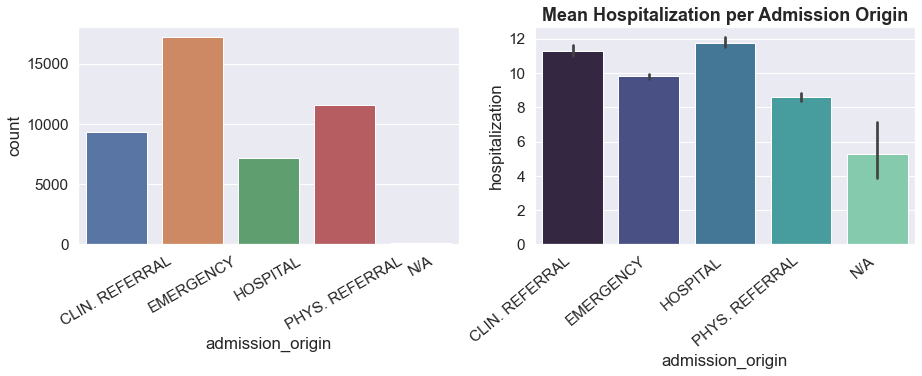

In [41]:
plt.figure(figsize=(15, 4))
ax1 =plt.subplot(121)
ax1=sns.countplot(x='admission_origin', data=data)
plt.xticks(rotation=30)
ax2 = plt.subplot(122)
ax2.set_title('Mean Hospitalization per Admission Origin', fontweight= 'bold', fontsize=18)
ax2 =sns.barplot(x='admission_origin', y='hospitalization',palette ='mako', data=data)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha= 'right')

# 6. Admission Diagnosis

In [ ]:
frequency_adm_origin = pd.DataFrame({'Absolute':data['admission_diagnosis'].value_counts(),               
                                  'Relative':(data['admission_diagnosis'].value_counts())/len(data)})
frequency_adm_origin

In [33]:
data['admission_diagnosis'].value_counts()

NEWBORN                    6554
CORONARY ARTERY DISEASE    2586
PNEUMONIA                  1613
CHEST PAIN                 1204
SEPSIS                     1131
                           ... 
HEMORRHAGIC SHOCK             1
ABD ABSCESS                   1
THROAT PAIN                   1
PUMONARY NODULES              1
A. FIB                        1
Name: admission_diagnosis, Length: 6298, dtype: int64

In [556]:
data['admission_diagnosis'].isna().sum()

21

In [53]:
data['admission_diagnosis']=data['admission_diagnosis'].fillna('UNKNOWN') # Fill nan values with Unknown 
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('S/P', '')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('R/O', '')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('PRE/OP', '')

string_punc = ['\\', '/', ',' ,'-']
for i in string_punc:
    data['admission_diagnosis'] = data['admission_diagnosis'].str.replace(i, ';')
    
data['admission_diagnosis']=data['admission_diagnosis'].str.strip()
data['num_admission_diagnosis']=data['admission_diagnosis'].str.count(';').add(1)
data['num_admission_diagnosis'] = data['num_admission_diagnosis'].fillna(1.0)

In [189]:
data['num_admission_diagnosis'].value_counts()

1    32883
2    10909
3     3975
4      860
5      256
6       64
7       22
8        5
9        2
Name: num_admission_diagnosis, dtype: int64

In [54]:
data['admission_diagnosis']=data['admission_diagnosis'].str.split(';', expand=True)[0]
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('?', '')

In [55]:
a=data['admission_diagnosis'].str.contains('CORONARY').to_frame()   # CORONARY ARTERY DISEASE cleaning
a= a.rename({'admission_diagnosis': 'admission_diagnosis_cor'},axis=1)
data = pd.concat([data, a], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_cor'][i] == True:
        data['admission_diagnosis'][i] = 'CORONARY ARTERY DISEASE'     

b=data['admission_diagnosis'].str.contains('PNEUMONIA').to_frame()   # PNEUMONIA cleaning
b= b.rename({'admission_diagnosis': 'admission_diagnosis_pne'},axis=1)
data = pd.concat([data, b], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_pne'][i] == True:
        data['admission_diagnosis'][i] = 'PNEUMONIA' 
               
c=data['admission_diagnosis'].str.contains('CHEST').to_frame()   # CHEST PAIN cleaning
c= c.rename({'admission_diagnosis': 'admission_diagnosis_cp'},axis=1)
data = pd.concat([data, c], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_cp'][i] == True:
        data['admission_diagnosis'][i] = 'CHEST PAIN'
        
        
w=data['admission_diagnosis'].str.contains('HEART').to_frame()   #  cleaning
w= w.rename({'admission_diagnosis': 'admission_diagnosis_hr'},axis=1)
data = pd.concat([data, w], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_hr'][i] == True:
        data['admission_diagnosis'][i] = 'CONGESTIVE HEART FAILURE'        
       
    

d=data['admission_diagnosis'].str.contains('SEPSIS').to_frame()   # SEPSIS cleaning
d= d.rename({'admission_diagnosis': 'admission_diagnosis_sp'},axis=1)
data = pd.concat([data, d], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_sp'][i] == True:
        data['admission_diagnosis'][i] = 'SEPSIS'         
                
e=data['admission_diagnosis'].str.contains('AORTIC').to_frame()   # AORTIC STENOSIS cleaning
e= e.rename({'admission_diagnosis': 'admission_diagnosis_as'},axis=1)
data = pd.concat([data, e], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_as'][i] == True:
        data['admission_diagnosis'][i] = 'AORTIC STENOSIS'    
        
f=data['admission_diagnosis'].str.contains('MENTAL STATUS').to_frame()   # MENTAL STATUS cleaning
f= f.rename({'admission_diagnosis': 'admission_diagnosis_ms'},axis=1)
data = pd.concat([data, f], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_ms'][i] == True:
        data['admission_diagnosis'][i] = 'ALTERED MENTAL STATUS'     
        
g=data['admission_diagnosis'].str.contains('GASTROINTESTINAL BLEED').to_frame()   # GASTROINTESTINAL BLEED cleaning
g= g.rename({'admission_diagnosis': 'admission_diagnosis_gb'},axis=1)
data = pd.concat([data, g], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_gb'][i] == True:
        data['admission_diagnosis'][i] = 'GASTROINTESTINAL BLEED'   
        
h=data['admission_diagnosis'].str.contains('STROKE').to_frame()   # STROKE cleaning
h= h.rename({'admission_diagnosis': 'admission_diagnosis_st'},axis=1)
data = pd.concat([data, h], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_st'][i] == True:
        data['admission_diagnosis'][i] = 'STROKE'  
        
j=data['admission_diagnosis'].str.contains('FEVER').to_frame()   # FEVER cleaning
j= j.rename({'admission_diagnosis': 'admission_diagnosis_fv'},axis=1)
data = pd.concat([data, j], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_fv'][i] == True:
        data['admission_diagnosis'][i] = 'FEVER'                            
        
k=data['admission_diagnosis'].str.contains('FALL').to_frame()   # FALL cleaning
k= k.rename({'admission_diagnosis': 'admission_diagnosis_fl'},axis=1)
data = pd.concat([data, k], axis=1, sort=False) 

for i in range(data.shape[0]):
    if data['admission_diagnosis_fl'][i] == True:
        data['admission_diagnosis'][i] = 'FALL'                    

c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [56]:
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('CORNARY ARTERY DISEASE', 'CORONARY ARTERY DISEASE')
data.loc[[31182,17444,3507], 'admission_diagnosis'] = 'CORONARY ARTERY DISEASE'

data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('PNEMONIA', 'PNEUMONIA')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('PNA', 'PNEUMONIA')
data.loc[[18954,13729, 31968,14725,6359,10775,28508,36539,5319,31802,37635,43386,46545,28110,18954,28727]
         , 'admission_diagnosis'] = 'PNEUMONIA'

data.loc[[7138,45451,36740], 'admission_diagnosis'] = 'SEPSIS'

data.loc[[4905,11571,13773,44407,3981,32815,8030,47936], 'admission_diagnosis'] = 'CHEST PAIN'

data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('CHF', 'CONGESTIVE HEART FAILURE')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('CHF EXACERBATION', 'CONGESTIVE HEART FAILURE')
data.loc[[34870,35248,21328,13396,19994,37274,47408,15599,22556,40773,5874,21419,16683,28394,22376,29596,36348,8877,42550,
          7172,27062],'admission_diagnosis'] = 'CONGESTIVE HEART FAILURE'


def gs_bleed(x):
    if x in ('UGIB','LOWER GASTROINTESTINAL BLEED','UPPER GASTROINTESTINAL BLEED','GI BLEED','UPPER GI BLEED','LOWER GI BLEED'):
        return 'GASTROINTESTINAL BLEED'
    else:
        return x

data['admission_diagnosis'] = data['admission_diagnosis'].apply(gs_bleed)        
data.loc[[6636,4734,28286,41445,28698,40494,26279,8357,37472,20865,3131,8315,13099,11848,46936,16992,19659,22472,22286,
          46820,44194,20143,12635,24730,47205,47836,2262,6953,11689,22125,31983,19678,33704,10091,42152,21923,12996,26989,
          28963,48471,2826,4039,20770,27511,21665,23929,2556,9757,814,10575,347,19467,4786,46354,45815,27175,14229,35250,
         17199,32314,46030,35665,41352,22165,7343,21435,36922,37351,46500,37651,9950,43846]
         ,'admission_diagnosis'] ='GASTROINTESTINAL BLEED'

data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('CAROTID ARTERY STENOSIS', 'AORTIC STENOSIS')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('CAROTID STENOSIS', 'AORTIC STENOSIS')
data.loc[[38527,297,24071,15027,32738,26301,5801,38256,48841,3427,28961,34012,26003,40484,230,36481,29971,11308,12249,5362,
          4080,17301,3649,8334,41499,47761,23857,9404,16676,36516,4889,13079,17226,24224,27717,38747,24569,44555,11312]
         , 'admission_diagnosis'] = 'AORTIC STENOSIS'

data.loc[[48508,19699,46656,30251,30263,18822], 'admission_diagnosis'] = 'ALTERED MENTAL STATUS'

                                                                       
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('INTRACEREBRAL HEMORRHAGE', 'INTRACRANIAL HEMORRHAGE')    
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('INTRACEREBRAL HEMMORHAGE', 'INTRACRANIAL HEMORRHAGE')
data['admission_diagnosis'] = data['admission_diagnosis'].str.replace('INTRACRANIAL BLEED', 'INTRACRANIAL HEMORRHAGE')
data.loc[[37449,42836,3161,19355,26240,37552,42158,48072,3117,11664,19314,29144,30390,35108,39565,34027,48443,16650,46304,
          929,16665,24522,28282,28629,30271,33703,19779,17256,11419,10307,40770,1891,2695,12902,30784,48506,33374,28588]
         , 'admission_diagnosis'] = 'INTRACRANIAL HEMORRHAGE'

data.loc[[41189,1484,25838,28695,39094],'admission_diagnosis'] ='STROKE'


data['admission_diagnosis'] = data['admission_diagnosis'].str.strip()

In [57]:
data = data.drop(['admission_diagnosis_cor', 'admission_diagnosis_pne','admission_diagnosis_cp', 'admission_diagnosis_sp',
       'admission_diagnosis_as', 'admission_diagnosis_ms','admission_diagnosis_gb', 'admission_diagnosis_st',
       'admission_diagnosis_fv', 'admission_diagnosis_fl', 'admission_diagnosis_hr'], axis=1)

In [385]:
data['admission_diagnosis'].value_counts()

NEWBORN                              6554
CORONARY ARTERY DISEASE              2870
GASTROINTESTINAL BLEED               2136
PNEUMONIA                            1731
AORTIC STENOSIS                      1566
                                     ... 
SEPTIC RIGHT HIP                        1
METASTATIC BREAST CANCER TO LIVER       1
PULSLESS FOOT                           1
INTRAPRANCHYMECAL BLEED                 1
                                        1
Name: admission_diagnosis, Length: 5729, dtype: int64

In [58]:
def other(x):
    if x not in ('NEWBORN', 'CORONARY ARTERY DISEASE','GASTROINTESTINAL BLEED','PNEUMONIA','CHEST PAIN','SEPSIS',
                 'CONGESTIVE HEART FAILURE','INTRACRANIAL HEMORRHAGE','AORTIC STENOSIS','ALTERED MENTAL STATUS', 'STROKE',
                'FEVER', 'FALL'):
                 return 'OTHER'
    else:
                 return x
                 
data['admission_diagnosis']= data['admission_diagnosis'].apply(other)                 

In [59]:
mapping = { 'NEWBORN': 'NEWBORN',
           'CORONARY ARTERY DISEASE' : 'COR. ART. DISEASE',
           'GASTROINTESTINAL BLEED' : 'GASTR/NAL BLEED',
           'PNEUMONIA' : 'PNEUMONIA',
           'CHEST PAIN' : 'CHEST PAIN',
           'SEPSIS': 'SEPSIS',
           'CONGESTIVE HEART FAILURE': 'HEART FAILURE',
           'INTRACRANIAL HEMORRHAGE': 'INTR/NIAL BLEED',
           'AORTIC STENOSIS': 'AOR. STENOSIS',
           'ALTERED MENTAL STATUS': 'MENTAL CHANGE', 
           'STROKE': 'STROKE',
            'FEVER': 'FEVER', 
           'FALL': 'FALL',
          'OTHER' : 'OTHER'}

data['admission_diagnosis'] = data['admission_diagnosis'].map(mapping) 

In [55]:
data['admission_diagnosis'].value_counts()

OTHER                       26831
NEWBORN                      6554
CORONARY ARTERY DISEASE      2870
GASTROINTESTINAL BLEED       2136
PNEUMONIA                    1731
AORTIC STENOSIS              1565
CONGESTIVE HEART FAILURE     1371
SEPSIS                       1282
CHEST PAIN                   1229
ALTERED MENTAL STATUS         775
INTRACRANIAL HEMORRHAGE       767
STROKE                        684
FEVER                         662
FALL                          519
Name: admission_diagnosis, dtype: int64

[Text(0, 0, 'OTHER'),
 Text(1, 0, 'INV. MECH. VENTILATION'),
 Text(2, 0, 'VENOUS CATHETER'),
 Text(3, 0, 'NON-INV. MECH. VENTILATION'),
 Text(4, 0, 'BRAIN EXCISION'),
 Text(5, 0, 'TRACHEOSTOMY'),
 Text(6, 0, 'ENDOTRACHEAL TUBE'),
 Text(7, 0, 'CIRCUMCISION'),
 Text(8, 0, 'VACCINATION'),
 Text(9, 0, 'AORT. VALVE REPLACE'),
 Text(10, 0, 'PTCA')]

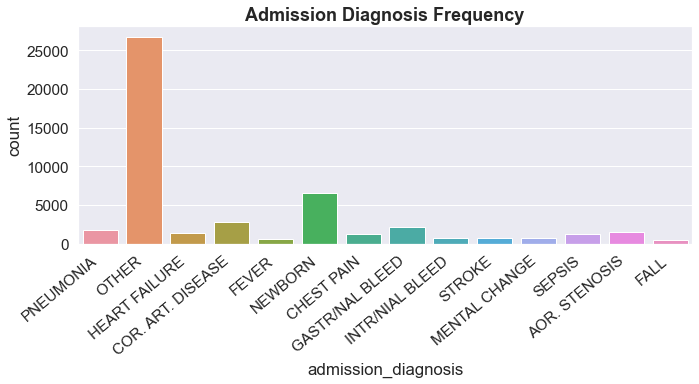

In [61]:
plt.figure(figsize=(11, 4))
ax1=sns.countplot(x='admission_diagnosis', data=data)
ax1.set_title('Admission Diagnosis Frequency', fontweight= 'bold', fontsize=18)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha= 'right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= 'right')

[Text(0, 0, 'PNEUMONIA'),
 Text(0, 0, 'OTHER'),
 Text(0, 0, 'HEART FAILURE'),
 Text(0, 0, 'COR. ART. DISEASE'),
 Text(0, 0, 'FEVER'),
 Text(0, 0, 'NEWBORN'),
 Text(0, 0, 'CHEST PAIN'),
 Text(0, 0, 'GASTR/NAL BLEED'),
 Text(0, 0, 'INTR/NIAL BLEED'),
 Text(0, 0, 'STROKE'),
 Text(0, 0, 'MENTAL CHANGE'),
 Text(0, 0, 'SEPSIS'),
 Text(0, 0, 'AOR. STENOSIS'),
 Text(0, 0, 'FALL')]

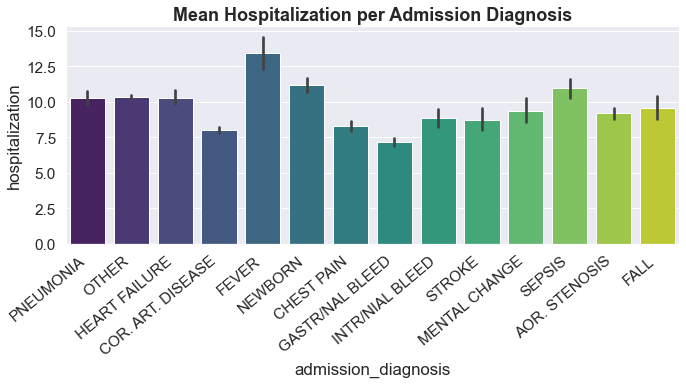

In [13]:
plt.figure(figsize=(11, 4))
ax =plt.subplot(111)
ax.set_title('Mean Hospitalization per Admission Diagnosis', fontweight= 'bold', fontsize=18)
ax= sns.barplot(x='admission_diagnosis', y='hospitalization', palette = 'viridis', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= 'right')


# 7. Insurance

In [253]:
data['insurance'].value_counts()

Medicare      22590
Private       18196
Medicaid       4689
Government     1434
                636
Self Pay        489
?               112
Name: insurance, dtype: int64

In [254]:
data['insurance'].isna().sum()

830

In [16]:
(830+636+112)/48976

0.03221986278993793

In [63]:
def missing_insurance(x):
    if x in (' ', '?'):
        return 'Medicare'
    else:
        return x
data['insurance']= data['insurance'].apply(missing_insurance) 
data['insurance']= data['insurance'].fillna(data['insurance'].mode()[0]) 
data['insurance'].value_counts()

Medicare      24168
Private       18196
Medicaid       4689
Government     1434
Self Pay        489
Name: insurance, dtype: int64

In [187]:
frequency_insurance = pd.DataFrame({'Absolute':data['insurance'].value_counts(),
                                  'Relative':(data['insurance'].value_counts())/len(data)})
frequency_insurance

,Absolute,Relative
Medicare,24168,0.493466
Private,18196,0.371529
Medicaid,4689,0.095741
Government,1434,0.029280
Self Pay,489,0.009984


[Text(0, 0, 'Medicare'),
 Text(0, 0, 'Government'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Medicaid'),
 Text(0, 0, 'Self Pay')]

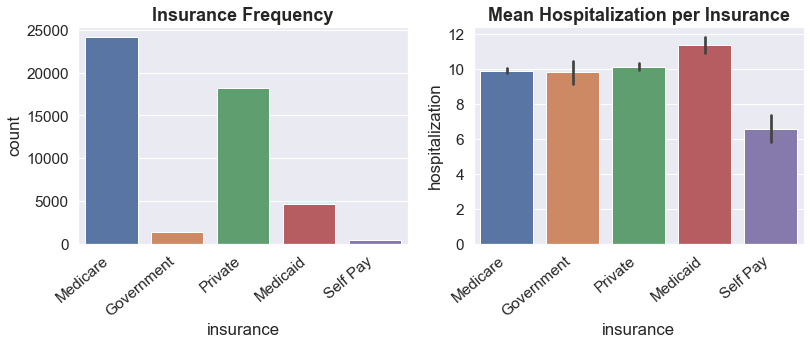

In [66]:
plt.figure(figsize=(13, 4))
ax1 = plt.subplot(121)
ax1=sns.countplot(x='insurance', data=data)
ax1.set_title('Insurance Frequency', fontweight= 'bold', fontsize=18)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha= 'right')
ax2 = plt.subplot(122)
ax2 =sns.barplot(x='insurance', y='hospitalization', data=data)
ax2.set_title('Mean Hospitalization per Insurance', fontweight= 'bold', fontsize=18)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha= 'right')

# 8. Religion

In [256]:
frequency_religion = pd.DataFrame({'Absolute':data['religion'].value_counts(),
                                  'Relative':(data['religion'].value_counts())/len(data)})
frequency_religion

,Absolute,Relative
CATHOLIC,16865,0.344352
NOT SPECIFIED,9549,0.194973
UNOBTAINABLE,6738,0.137578
PROTESTANT QUAKER,5824,0.118915
JEWISH,4357,0.088962
OTHER,2200,0.044920
EPISCOPALIAN,620,0.012659
STAN,573,0.011700
GREEK ORTHODOX,382,0.007800
CHRISTIAN SCIENTIST,351,0.007167


In [257]:
data['religion'].isna().sum()

378

In [65]:
def religion_categories(x):
    if x in ('NOT SPECIFIED', 'UNOBTAINABLE', 'OTHER', 'STAN'):
        return 'OTHER'
    elif x in ('HEBREW', 'JEWISH', 'MUSLIM'):
        return 'JEWISH'
    elif x in ('PROTESTANT QUAKER', 'EPISCOPALIAN', 'CHRISTIAN SCIENTIST', "JEHOVAH'S WITNESS", 'ROMANIAN EAST. ORTH',
              '7TH DAY ADVENTIST', 'BAPTIST', 'METHODIST', 'UNITARIAN-UNIVERSALIST', 'GREEK ORTHODOX'):
        return 'ORTHODOX'
    elif x in ('SCIENTOLOGY', 'BUDDHIST', 'HINDU'):
        return 'BUDDHIST'
    else:
        return x

data['religion']= data['religion'].apply(religion_categories) 
data['religion']= data['religion'].fillna(data['religion'].mode()[0])

In [190]:
data['religion'].value_counts()

OTHER       19060
CATHOLIC    16865
ORTHODOX     7559
JEWISH       4558
BUDDHIST      556
Name: religion, dtype: int64

Text(0.5, 1.0, 'Mean Hospitalization per Religion')

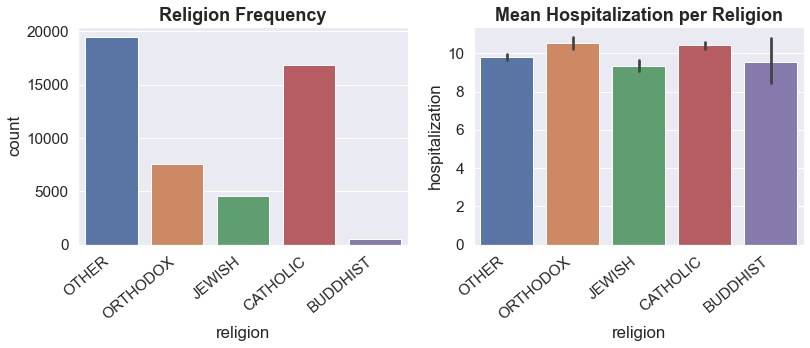

In [72]:
plt.figure(figsize=(13, 4))
ax1 = plt.subplot(121)
ax1=sns.countplot(x='religion', data=data)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha= 'right')
ax1.set_title('Religion Frequency', fontweight= 'bold', fontsize=18)
ax2 = plt.subplot(122)
ax2=sns.barplot(x='religion', y='hospitalization', data=data)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha= 'right')
ax2.set_title('Mean Hospitalization per Religion', fontweight= 'bold', fontsize=18)

# 9. Marital Status

In [259]:
frequency_marital_status = pd.DataFrame({'Absolute':data['marital_status'].value_counts(),
                                  'Relative':(data['marital_status'].value_counts())/len(data)})
frequency_marital_status

,Absolute,Relative
MARRIED,19935,0.407036
SINGLE,10968,0.223946
WIDOWED,5947,0.121427
DIVORCED,2672,0.054557
SEPARATED,472,0.009637
UNKNOWN (DEFAULT),284,0.005799
?,37,0.000755
LIFE PARTNER,12,0.000245


In [255]:
print(data['marital_status'].isna().sum())
print('Percentage of NaN values: ', (8649+37)/48976 )

8649
Percentage of NaN values:  0.17735217249264945


In [69]:
def missing_marital(x):
    if x in ('?', 'LIFE PARTNER'):
        return 'MARRIED'
    elif x in ('WIDOWED','DIVORCED', 'SEPARATED'):
        return 'DIVORCED'
    else:
        return x

data['marital_status'] = data['marital_status'].apply(missing_marital)
data['marital_status'].value_counts()

MARRIED              19984
SINGLE               10968
DIVORCED              9091
UNKNOWN (DEFAULT)      284
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'Mean Hospitalization per Marital Status')

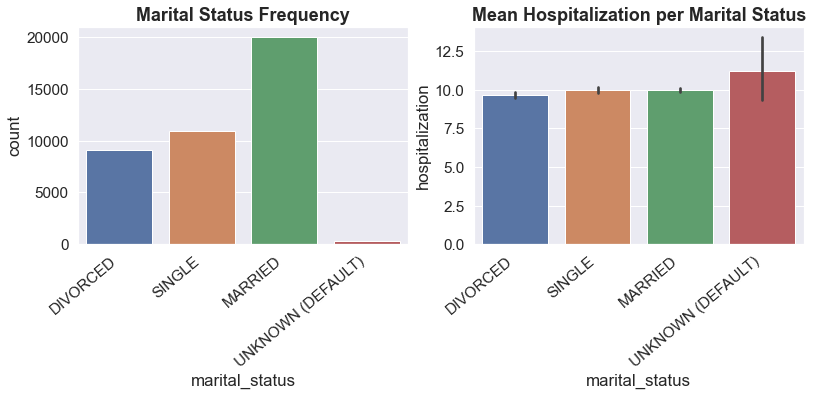

In [70]:
plt.figure(figsize=(13, 4))
ax1 = plt.subplot(121)
ax1=sns.countplot(x='marital_status', data=data)
ax1.set_title('Marital Status Frequency', fontweight= 'bold', fontsize=18)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha= 'right')
ax2 = plt.subplot(122)
ax2 =sns.barplot(x='marital_status', y='hospitalization', data=data)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha= 'right')
ax2.set_title('Mean Hospitalization per Marital Status', fontweight= 'bold', fontsize=18)

# 10. Ethnicity

In [262]:
frequency_ethnicity = pd.DataFrame({'Absolute':data['ethnicity'].value_counts(),
                                  'Relative':(data['ethnicity'].value_counts())/len(data)})
frequency_ethnicity

,Absolute,Relative
WHITE,20460,0.417756
CAUCASIAN,11169,0.228050
BLACK/AFRICAN AMERICAN,4529,0.092474
GUERO,2164,0.044185
UNKNOWN/NOT SPECIFIED,1438,0.029361
HISPANIC OR LATINO,1432,0.029239
OTHER,1267,0.025870
ASIAN,1253,0.025584
?,737,0.015048
UNABLE TO OBTAIN,669,0.013660


In [256]:
print(data['ethnicity'].isna().sum())
print('Percentage of NaN values: ', (737+701)/48976)

701
Percentage of NaN values:  0.029361319830120875


In [71]:
def clean_ethnicity(x):
    if x in ('WHITE', 'WHITE - BRAZILIAN', 'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN', '?',
             'PORTUGUESE','CAUCASIAN' , 'CAUCATIAN', 'UNK', 'MIDDLE EASTERN', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
             'AMERICAN INDIAN/ALASKA NATIVE','CARIBBEAN ISLAND', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
            'HISPANIC/LATINO - CUBAN', 'HISPANIC OR LATINO','HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - DOMINICAN',
            'HISPANIC/LATINO - GUATEMALAN', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)','HISPANIC/LATINO - SALVADORAN', 
            'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN', 'GUERO', 'SOUTH AMERICAN'):
        return 'WHITE'
    elif x in ('ASIAN', 'ASIAN - CHINESE','ASIAN - ASIAN INDIAN', 'ASIAN - THAI', 'ASIAN - CAMBODIAN',
       'ASIAN - OTHER', 'ASIAN - FILIPINO', 'ASIAN - VIETNAMESE', 'ASIAN - JAPANESE', 'ASIAN - KOREAN'):
        return 'ASIAN'
    elif x in ('BLACK/AFRICAN AMERICAN', 'BLACK/AFRICAN', 'BLACK/HAITIAN', 'BLACK/CAPE VERDEAN'):
        return 'BLACK'
    elif x in ('PATIENT DECLINED TO ANSWER', 'UNKNOWN/NOT SPECIFIED', 'UNABLE TO OBTAIN', 'NOT SPECIFIED', 'UNKNOWN', 
               'OTHER', 'MULTI RACE ETHNICITY'):
        return 'UKNOWN'
    else:
        return x
    
data['ethnicity']= data['ethnicity'].apply(clean_ethnicity)
data['ethnicity']= data['ethnicity'].fillna(data['ethnicity'].mode()[0])

In [265]:
frequency_ethnicity = pd.DataFrame({'Absolute':data['ethnicity'].value_counts(),
                                  'Relative':(data['ethnicity'].value_counts())/len(data)})
frequency_ethnicity

,Absolute,Relative
WHITE,38185,0.779668
BLACK,4818,0.098375
UKNOWN,4311,0.088023
ASIAN,1662,0.033935


Text(0.5, 1.0, 'Mean Hospitalization per Ethnicity')

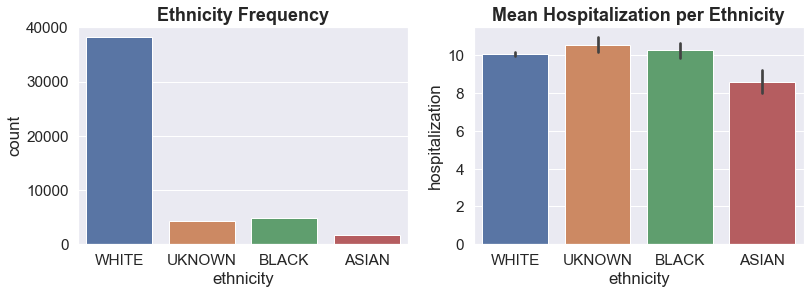

In [73]:
plt.figure(figsize=(13, 4))
ax1 = plt.subplot(121)
ax1.set_title('Ethnicity Frequency', fontweight= 'bold', fontsize=18)
ax1=sns.countplot(x='ethnicity', data=data)
ax1.set_title('Ethnicity Frequency', fontweight= 'bold', fontsize=18)
ax2 = plt.subplot(122)
ax2 =sns.barplot(x='ethnicity', y='hospitalization', data=data)
ax2.set_title('Mean Hospitalization per Ethnicity', fontweight= 'bold', fontsize=18)

# 11. Admission Procedure 

In [257]:
print(data['admission_procedure'].isna().sum())
print('Percentage of NaN values: ', (1173+1492+3620)/48976)

1492
Percentage of NaN values:  0.128328160731787


In [228]:
frequency_admission_procedure = pd.DataFrame({'Absolute':data['admission_procedure'].value_counts(),
                                  'Relative':(data['admission_procedure'].value_counts())/len(data)})
frequency_admission_procedure

,Absolute,Relative
na,3620,0.073914
Cont inv mec ven <96 hrs,2798,0.057130
Vaccination NEC,2249,0.045920
Venous cath NEC,1609,0.032853
Insert endotracheal tube,1512,0.030872
...,...,...
Ileostomy NOS,1,0.000020
Abdomen wall repair NEC,1,0.000020
Eyelid biopsy,1,0.000020
Remov imp dev-chest cage,1,0.000020


In [194]:
text_data = data['admission_procedure']
text_data = text_data.fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(set([text for text in text_data]))

vect = TfidfVectorizer()                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 
arr = pairwise_similarity.toarray()     
np.fill_diagonal(arr, np.nan)                                                                                                                                                                                                                     


sim_df = pd.DataFrame(arr,index= corpus, columns = corpus)
sim_unst = pd.DataFrame(sim_df.unstack(),columns=['similarity'])
similarText = sim_unst[(sim_unst['similarity'] > 0.5)].reset_index()
similarText.sort_values(by='similarity').head(20)

import spacy
nlp = spacy.load("en_core_web_lg")

#similarText['semantic_similarity'] = similarText[['level_0','level_1']].\
#                                    apply(lambda text1,text2:nlp(text1).similarity(nlp(text2)))

col1 = similarText['level_0'].copy()
col2 = similarText['level_1'].copy()
lista = []
for i in range(len(col1)):
    text1 = nlp(col1[i])
    text2 = nlp(col2[i])
    lista.append(text1.similarity(text2))
    
similarText['semantic_similarity'] = lista       

similarText = similarText[(similarText['semantic_similarity'] > 0.5)]

c:\users\maria\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.


In [195]:
similarText

,level_0,level_1,similarity,semantic_similarity
0,Open brain biopsy,Open pancreatic biopsy,0.531885,0.860635
1,Open brain biopsy,Open lung biopsy,0.579760,0.884922
2,Open brain biopsy,Open gastric biopsy,0.567648,0.840754
3,Open brain biopsy,Open liver biopsy,0.555000,0.894481
4,Open brain biopsy,Open renal biopsy,0.542559,0.850357
...,...,...,...,...
1509,Humerus biopsy,Humerus sequestrectomy,0.519383,0.777029
1510,Drug detoxification,Alcohol detoxification,0.529330,0.872141
1511,Removal of lead w/o repl,Removal brain stim lead,0.534257,0.662970
1512,Removal of lead w/o repl,Removal spine stim lead,0.516534,0.680155


In [23]:
def simi(x):                                 # Categories grouping based on similarity
    if x =='Cont inv mec ven <96 hrs':
        return 'Cont inv mec ven 96+ hrs'
    elif x == 'Influenza vaccination':
        return 'Vaccination NEC'
    elif x == 'Venous puncture NEC':
        return 'Venous cath NEC'
    elif x in ('Insert intestinal tube', 'Insert rectal tube', 'Insert gastric tube NEC'):
        return 'Insert endotracheal tube'
    elif x in ('Opn/oth rep tcspd vlv-ts', 'Opn/oth rep mtrl vlv-tis', 'Opn/oth rep pulm vlv-tis'):
        return 'Opn/oth rep aort vlv-tis'
    elif x == '1 int mam-cor art bypass':
        return '2 int mam-cor art bypass'
    elif x in ('Aortocor bypas-1 cor art', 'Aortcor bypas-4+ cor art', 'Aortocor bypas-3 cor art'):
        return 'Aortocor bypas-2 cor art'
    elif x in ('Temporary colostomy','Temporary ileostomy'):
        return 'Temporary tracheostomy'
    elif x == 'Sm bowel endoscopy NEC':
        return 'Sm-to-sm bowel anastom'
    elif x =='Entral infus nutrit sub':
        return 'Parent infus nutrit sub'
    elif x in ('Other bronchial excision', 'Other brain incision', 'Other pleural excision'):
        return 'Other brain excision'
    elif x in ('Opn aortic valvuloplasty', 'Opn/oth rep mitral valve'):
        return 'Opn/oth rep aortic valve'
    elif x in ('Left heart cardiac cath', 'Rt heart cardiac cath'):
        return 'Rt/left heart card cath'
    elif x == 'Arterial catheterization':
        return 'Ureteral catheterization'
    elif x in ('Kidney transplant NEC', 'Liver repair NEC'):
        return 'Liver transplant NEC'
    elif x in ('Open red-int fix finger', 'Closed red-int fix femur', 'Cl fx reduc-femur','Cl fx reduc-int fix NEC', 
               'Open red-int fix humerus'):
        return 'Open reduc-int fix femur'
    elif x in ('Dx ultrasound-abdomen', 'Dx ultrasound-thorax NEC', 'Dx ultrasound-digestive', 'Dx ultrasound NEC'):
        return 'Dx ultrasound-heart' 
    elif x in ('Endosc destruc bronc les', 'Endosc destruc lung les'):
        return 'Endosc destruc esoph les'    
    elif x in ('Int insert lead in vent', 'Repl tv atri-vent lead'):
        return 'Int inser lead atri-vent'
    elif x == 'Alcohol detoxification' :
        return 'Drug detoxification'    
    elif x == 'Resect thorac ves w repl':
        return 'Arm ves resect w replace'    
    elif x in ('Bronchial repair NEC', 'Closed lung biopsy','Closed rectal biopsy', 'Closed biopsy larynx',
               'Closed liver biopsy','Closed renal biopsy','Closed spleen biopsy','Closed pancreatic biopsy',
               'Closed brain biopsy'):
        return 'Closed bronchial biopsy'
    elif x == 'Endosc inser stent bile':
        return 'Endosc inser panc stent'    
    elif x == 'Perc angio extracran ves':
        return'Perc angio intracran ves'
    elif x == 'Drsl/dslmb fus post/post':
        return 'Lmb/lmbsac fus post/post'
    elif x == 'Other tracheal repair':
        return 'Other tracheal operation'
    elif x == 'Exploratory laparotomy':
        return 'Exploratory thoracotomy'
    elif x in ('Op red-int fix metac/car','Op red-int fix metat/tar','Cl red-int fix tib/fibu','Op red-int fix rad/ulna'):
        return 'Op red-int fix tib/fibul'
    elif x in ('Refus oth cervcl ant/ant', 'Refus drs/drslmb ant/ant','Refus lmb/lmbsac ant/ant'):
        return 'Oth cerv fusion ant/ant'
    elif x == 'Percu nephrostm w/o frag':
        return 'Percu nephrostmy w frag'
    elif x == 'Intra-abd venous shunt':
        return 'Intra-abdomin shunt NEC'
    elif x == 'Insert intercostal cath':
        return 'Insert indwelling cath'
    elif x in ('Repl pacem w dual-cham','Int insert 1-cham, rate','Int insert 1-cham, non'):
        return 'Int insert dual-cham dev'
    elif x in ('Spinal canal inject NEC','Insert spinal canal cath','Mri spinal canal'):
        return 'Spinal canal explor NEC'
    else:
        return x
               
data['admission_procedure'] = data['admission_procedure'].apply(simi)              

In [24]:
data['admission_procedure']= data['admission_procedure'].fillna('NaN')

In [567]:
data['admission_procedure'].value_counts()[:20]

na                          3620
Cont inv mec ven <96 hrs    2798
Vaccination NEC             2249
Venous cath NEC             1609
Insert endotracheal tube    1512
Circumcision                1444
Cont inv mec ven 96+ hrs    1348
                            1173
Opn/oth rep aort vlv-tis    1141
1 int mam-cor art bypass     960
PTCA                         858
Aortocor bypas-2 cor art     846
Non-invasive mech vent       824
Temporary tracheostomy       804
Sm bowel endoscopy NEC       792
Aortocor bypas-3 cor art     772
Hemodialysis                 522
Other phototherapy           522
Entral infus nutrit sub      501
Other brain excision         481
Name: admission_procedure, dtype: int64

In [25]:
def grouping(x):   # Grouping for visualization purposes
    if x not in ('Cont inv mec ven 96+ hrs','Vaccination NEC','Aortocor bypas-1 cor art','Opn/oth rep aortic valve',
                 'Venous cath NEC','Insert endotracheal tube','Circumcision', 'Entral infus nutrit sub','PTCA',
                 'Temporary tracheostomy','Non-invasive mech vent','Sm bowel endoscopy NEC','Other brain excision'):
        return 'Other'
    else:
        return x
 
data['admission_procedure']=data['admission_procedure'].apply(grouping)

In [26]:
mapping = { 'Cont inv mec ven 96+ hrs': 'INV. MECH. VENTILATION',
           'Vaccination NEC' : 'VACCINATION',
           'Aortocor bypas-1 cor art' : 'ARTERY BYPASS',
           'Opn/oth rep aortic valve': 'AORT. VALVE REPLACE',
           'Venous cath NEC' :'VENOUS CATHETER',
           'Insert endotracheal tube': 'ENDOTRACHEAL TUBE',
           'Circumcision': 'CIRCUMCISION', 
           'Entral infus nutrit sub': 'PARENT INFUS NUTRITION',
           'PTCA': 'PTCA',
           'Temporary tracheostomy': 'TRACHEOSTOMY',
           'Non-invasive mech vent': 'NON-INV. MECH. VENTILATION',
           'Sm bowel endoscopy NEC': 'BOWEL ENDOSCOPY',
           'Other brain excision': 'BRAIN EXCISION',
          'Other': 'OTHER'}

data['admission_procedure'] = data['admission_procedure'].map(mapping)  

In [190]:
data['admission_procedure'].value_counts()

Inject/inf thrombo agent    181
Colonoscopy                 174
Part sm bowel resect NEC    169
Opn rt hemicolectomy NEC    168
Dx ultrasound-heart         160
Endosc destruc esoph les    158
Resect abdm aorta w repl    155
Implt/repl carddefib tot    154
Skin closure NEC            140
Int inser lead atri-vent    140
Endosc sphincterotomy       137
Alcohol detoxification      135
Resect thorac ves w repl    135
Closed bronchial biopsy     133
Endosc inser stent bile     131
Annuloplasty                127
Perc angio extracran ves    119
Drsl/dslmb fus post/post    118
Oth periton adhesiolysis    112
Exploratory laparotomy      111
Name: admission_procedure, dtype: int64

[Text(0, 0, 'OTHER'),
 Text(0, 0, 'INV. MECH. VENTILATION'),
 Text(0, 0, 'VENOUS CATHETER'),
 Text(0, 0, 'NON-INV. MECH. VENTILATION'),
 Text(0, 0, 'BRAIN EXCISION'),
 Text(0, 0, 'TRACHEOSTOMY'),
 Text(0, 0, 'ENDOTRACHEAL TUBE'),
 Text(0, 0, 'CIRCUMCISION'),
 Text(0, 0, 'VACCINATION'),
 Text(0, 0, 'AORT. VALVE REPLACE'),
 Text(0, 0, 'PTCA')]

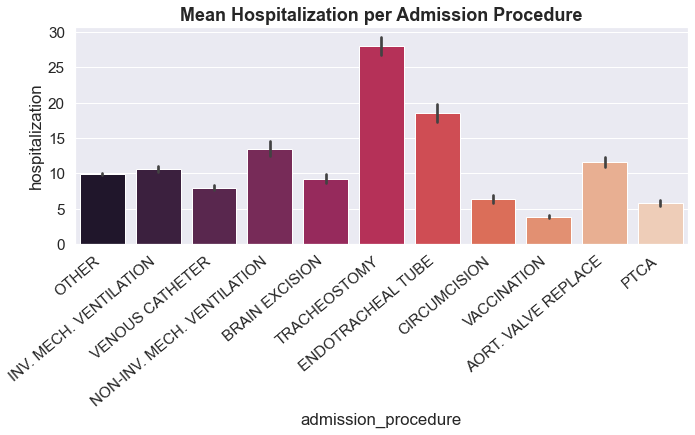

In [27]:
plt.figure(figsize=(11, 4))
ax = plt.subplot(111)
ax.set_title('Mean Hospitalization per Admission Procedure',fontweight= 'bold', fontsize=18)
ax=sns.barplot(x='admission_procedure', y='hospitalization',palette='rocket', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= 'right')

# 12. Expired

In [267]:
frequency_expired = pd.DataFrame({'Absolute':data['expired'].value_counts(),
                                  'Relative':(data['expired'].value_counts())/len(data)})
frequency_expired

,Absolute,Relative
0,44138,0.901217
1,4838,0.098783


Text(0.5, 1.0, 'Mean Hospitalization per Expired')

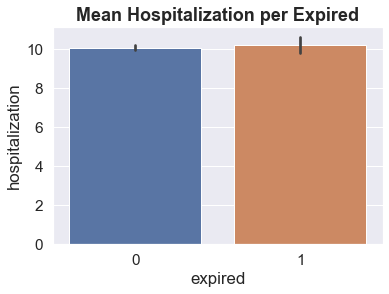

In [74]:
plt.figure(figsize=(13, 4))
ax1 = plt.subplot(121)
ax1 =sns.barplot(x='expired', y='hospitalization', data=data)
ax1.set_title('Mean Hospitalization per Expired', fontweight= 'bold', fontsize=18)

# 13. Numerical Data

In [51]:
data.describe()

,age,hospitalization,num_callouts,num_diagnoses,num_procedures,num_cptevents,num_inputevents,num_labevents,num_microbiologyevents,num_noteevents,num_outputevents,num_procedureevents,num_transfers,num_chartevents,expired,patient_id
count,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000,48976.000000
mean,52.880574,10.085454,0.486606,2.677291,0.719005,1.046329,30.138027,46.397052,1.179823,6.293144,7.094189,0.690277,1.070524,527.014599,0.098783,24487.500000
std,26.072615,12.445730,0.856137,8.188330,3.674547,2.002183,63.043404,76.221281,4.477031,102.092164,7.457007,2.144865,3.159967,653.364421,0.298374,14138.297729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,3.710000,0.000000,1.000000,0.000000,0.000000,5.000000,27.000000,0.000000,0.000000,2.000000,0.000000,0.000000,207.000000,0.000000,12243.750000
50%,59.000000,6.420000,0.000000,1.000000,0.000000,1.000000,14.000000,39.000000,1.000000,0.000000,5.000000,0.000000,1.000000,418.000000,0.000000,24487.500000
75%,73.000000,11.750000,1.000000,2.000000,1.000000,2.000000,34.000000,51.000000,1.000000,1.000000,10.000000,1.000000,1.000000,699.000000,0.000000,36731.250000
max,89.000000,294.630000,20.000000,350.000000,275.000000,225.000000,6825.000000,5175.000000,375.000000,5625.000000,375.000000,100.000000,100.000000,49325.000000,1.000000,48975.000000


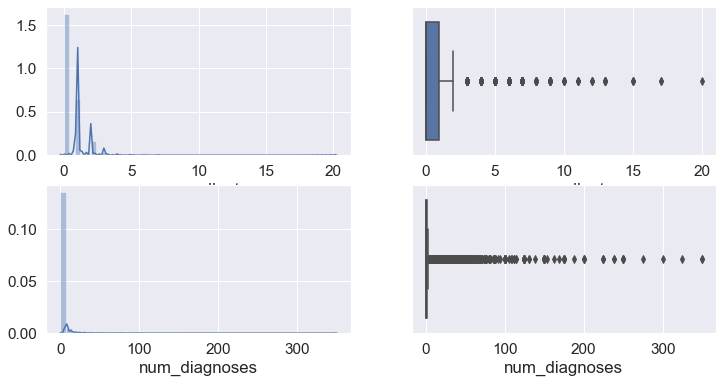

In [199]:
plt.figure(figsize= (12,6))   # Outliers
ax1 = plt.subplot(221)
sns.distplot(data['num_callouts'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_callouts', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_diagnoses'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_diagnoses', data=data, ax=ax4)

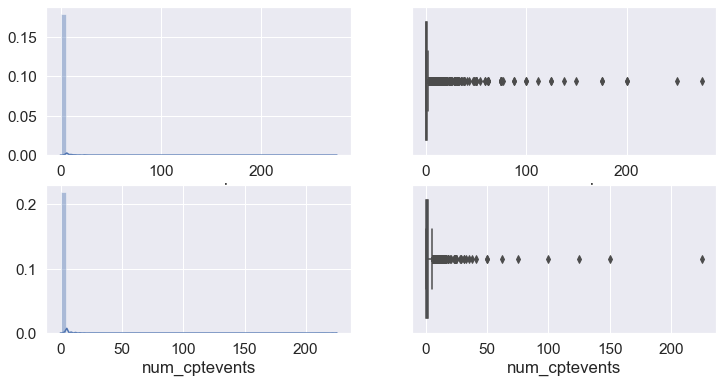

In [200]:
plt.figure(figsize= (12,6))
ax1 = plt.subplot(221)
sns.distplot(data['num_procedures'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_procedures', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_cptevents'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_cptevents', data=data, ax=ax4)

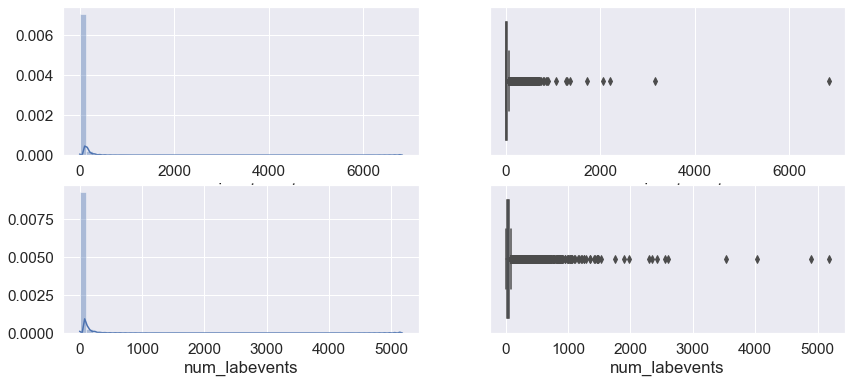

In [201]:
plt.figure(figsize= (14,6))
ax1 = plt.subplot(221)
sns.distplot(data['num_inputevents'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_inputevents', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_labevents'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_labevents', data=data, ax=ax4)

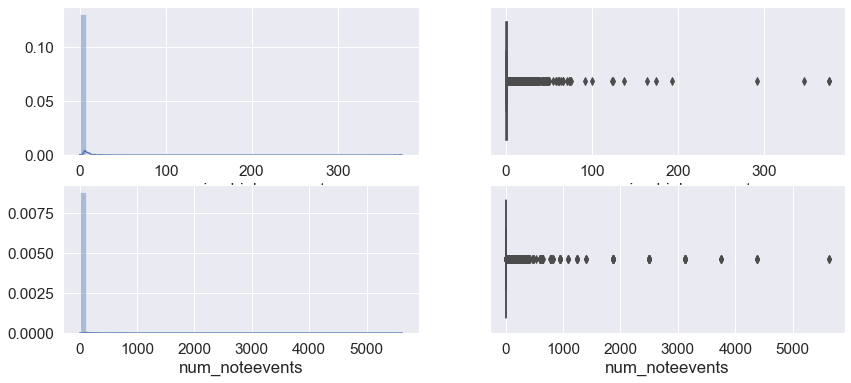

In [202]:
plt.figure(figsize= (14,6))
ax1 = plt.subplot(221)
sns.distplot(data['num_microbiologyevents'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_microbiologyevents', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_noteevents'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_noteevents', data=data, ax=ax4)

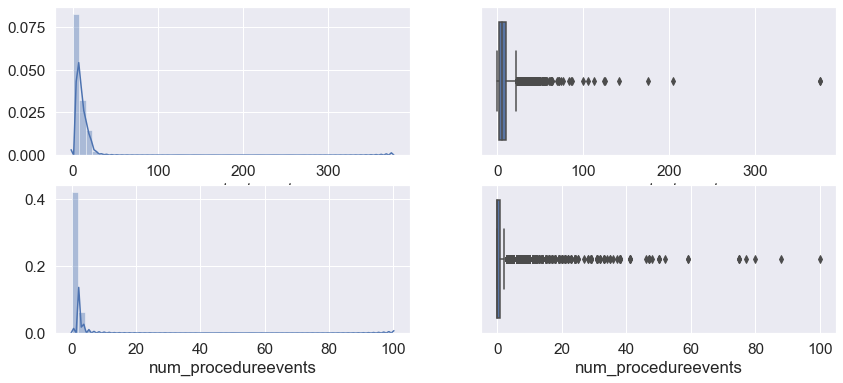

In [203]:
plt.figure(figsize= (14,6))
ax1 = plt.subplot(221)
sns.distplot(data['num_outputevents'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_outputevents', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_procedureevents'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_procedureevents', data=data, ax=ax4)

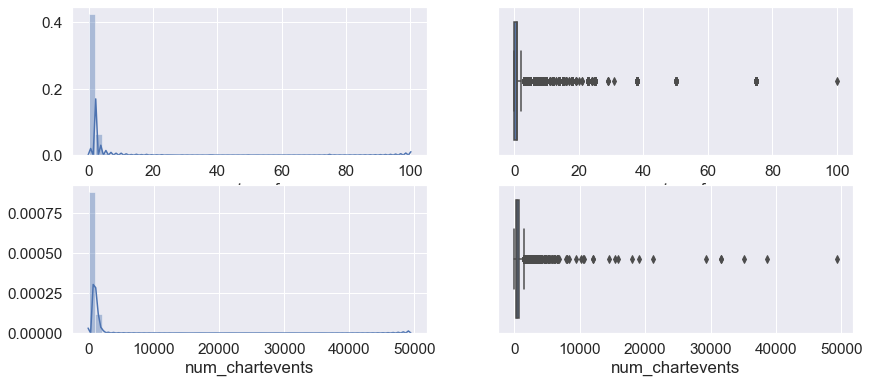

In [204]:
plt.figure(figsize= (14,6))
ax1 = plt.subplot(221)
sns.distplot(data['num_transfers'])
ax2 = plt.subplot(222)
sns.boxplot(x='num_transfers', data=data, ax=ax2)
ax3 = plt.subplot(223)
sns.distplot(data['num_chartevents'])
ax4 = plt.subplot(224)
sns.boxplot(x='num_chartevents', data=data, ax=ax4)

## 14. Preprocessing

### 14.1 Fill in nan values in admission origin

In [121]:
data = pd.get_dummies(data, columns = ['gender','admission_type','insurance', 'religion', 'ethnicity', 'admission_diagnosis'])

In [122]:
import category_encoders as ce
encoder = ce.BinaryEncoder() 
data_encoded = encoder.fit_transform(data['admission_procedure'])

In [123]:
data = pd.concat([data, data_encoded], axis=1, sort=False)

In [124]:
mapping = { 'ADMITTED FROM EMERGENCY': 0,
            'PHYSICAL REFERRAL' :1,
            'CLINIC REFERRAL' :2,
            'TRANSFER FROM HOSPITAL': 3,
            'NOT AVAILABLE' :4}

data['admission_origin'] = data['admission_origin'].map(mapping)  

In [125]:
sub = data.drop(['marital_status', 'patient_id', 'admission_procedure' ], axis=1)

In [126]:
tr = sub.dropna()     # drop the nan values 
te =sub[sub['admission_origin'].isna()]  
tr.shape, te.shape

((45400, 63), (3576, 63))

In [127]:
X_train = tr.drop('admission_origin', axis=1).values
y_train = tr['admission_origin'].values
X_test = te.drop('admission_origin', axis=1).values
X_train.shape, y_train.shape, X_test.shape 

((45400, 62), (45400,), (3576, 62))

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

In [129]:
data.loc[data['admission_origin'].isna(), 'admission_origin'] = preds

In [130]:
mapping = {0: 'ADMITTED FROM EMERGENCY',
           1: 'PHYSICAL REFERRAL' ,
           2: 'CLINIC REFERRAL',
           3: 'TRANSFER FROM HOSPITAL',
           4: 'NOT AVAILABLE'}

data['admission_origin'] = data['admission_origin'].map(mapping)   

### 14.2 Fill in nan values in marital status

In [131]:
data = pd.get_dummies(data, columns = ['admission_origin'])

In [132]:
mapping = {'MARRIED': 0,
           'SINGLE' : 1,
           'DIVORCED': 2,
           'UNKNOWN (DEFAULT)': 3}

data['marital_status'] = data['marital_status'].map(mapping) 

In [133]:
sub = data.drop(['patient_id', 'admission_procedure' ], axis=1)

In [134]:
tr = sub.dropna()     # drop the nan values 
te =sub[sub['marital_status'].isna()]  
tr.shape, te.shape

((40327, 68), (8649, 68))

In [135]:
X_train = tr.drop('marital_status', axis=1).values
y_train = tr['marital_status'].values
X_test = te.drop('marital_status', axis=1).values
X_train.shape, y_train.shape, X_test.shape 

((40327, 67), (40327,), (8649, 67))

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

In [137]:
data.loc[data['marital_status'].isna(), 'marital_status'] = preds

In [138]:
mapping = {0 : 'MARRIED',
           1: 'SINGLE',
           2: 'DIVORCED',
           3: 'UNKNOWN (DEFAULT)'}

data['marital_status'] = data['marital_status'].map(mapping) 

In [139]:
data = data.drop([ 'num_callouts', 'num_diagnoses','num_procedures', 'num_cptevents','num_inputevents',
        'num_labevents', 'num_microbiologyevents','num_noteevents', 'num_outputevents', 'num_procedureevents','num_transfers',
        'num_chartevents', 'expired', 'patient_id', 'admission_procedure'], axis=1)

In [649]:
data = pd.get_dummies(data, columns = ['marital_status'])

In [4]:
data.columns

Index(['gender', 'age', 'hospitalization', 'admission_type',
       'admission_origin', 'admission_diagnosis', 'insurance', 'religion',
       'marital_status', 'ethnicity', 'num_callouts', 'num_diagnoses',
       'num_procedures', 'admission_procedure', 'num_cptevents',
       'num_inputevents', 'num_labevents', 'num_microbiologyevents',
       'num_noteevents', 'num_outputevents', 'num_procedureevents',
       'num_transfers', 'num_chartevents', 'expired', 'patient_id'],
      dtype='object')

In [30]:
import category_encoders as ce
encoder = ce.BinaryEncoder() 
data_encoded = encoder.fit_transform(data['admission_procedure'])   # Binary encoding of the variable procedure

In [31]:
data = pd.concat([data, data_encoded], axis=1, sort=False) 

In [ ]:
data.to_csv('bin_data.csv', index=False)